# Distribución gausiana con Media = 0 y Varianza = 1

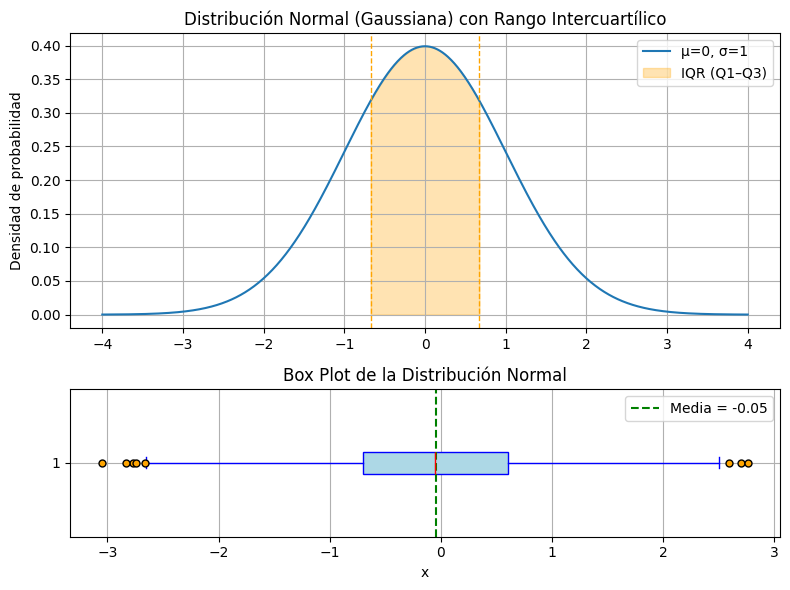

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu, sigma = 0, 1  # media y desviación estándar
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

# Calcular los cuartiles Q1 (25%) y Q3 (75%)
q1 = norm.ppf(0.25, loc=mu, scale=sigma)
q3 = norm.ppf(0.75, loc=mu, scale=sigma)

# Crear figura con dos subgráficos: curva gaussiana y boxplot
fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [2, 1]})

# --------- Subgráfico 1: Curva Gaussiana ---------
axs[0].plot(x, y, label="μ=0, σ=1")

# Sombrear el rango intercuartílico (IQR)
x_iqr = np.linspace(q1, q3, 500)
y_iqr = norm.pdf(x_iqr, mu, sigma)
axs[0].fill_between(x_iqr, y_iqr, color='orange', alpha=0.3, label="IQR (Q1–Q3)")

# Marcar líneas verticales para Q1 y Q3
axs[0].axvline(q1, color='orange', linestyle='--', linewidth=1)
axs[0].axvline(q3, color='orange', linestyle='--', linewidth=1)

axs[0].set_title("Distribución Normal (Gaussiana) con Rango Intercuartílico")
axs[0].set_ylabel("Densidad de probabilidad")
axs[0].grid()
axs[0].legend()

# --------- Subgráfico 2: Box Plot ---------
np.random.seed(0)
datos = np.random.normal(loc=mu, scale=sigma, size=1000)
axs[1].boxplot(datos, vert=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'),
               flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))

# Línea vertical para la media
media = np.mean(datos)
axs[1].axvline(media, color='green', linestyle='--', label=f'Media = {media:.2f}')

axs[1].set_xlabel("x")
axs[1].set_title("Box Plot de la Distribución Normal")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Distribuciones gausianas con diferentes valores de Varianza

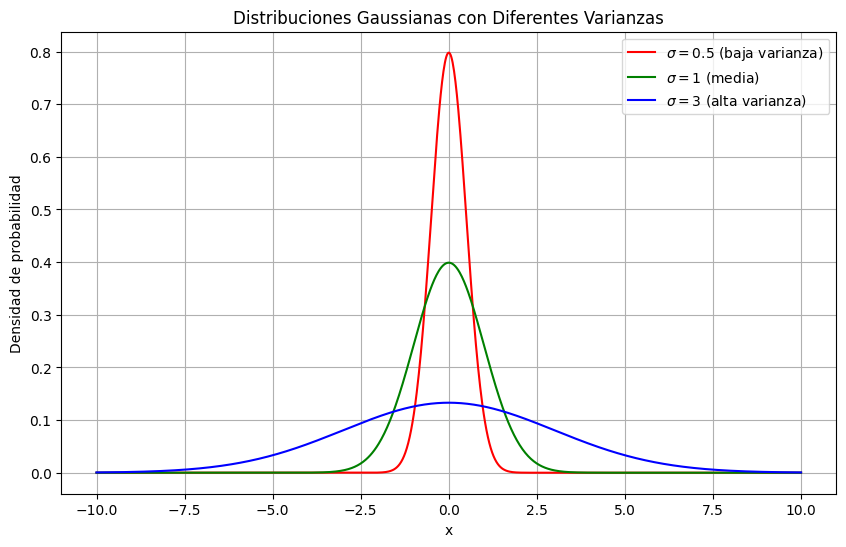

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Media común
mu = 0

# Tres desviaciones estándar diferentes
sigmas = [0.5, 1, 3]
labels = [r"$\sigma=0.5$ (baja varianza)", r"$\sigma=1$ (media)", r"$\sigma=3$ (alta varianza)"]
colors = ["red", "green", "blue"]

# Rango común para x
x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(10, 6))
for sigma, label, color in zip(sigmas, labels, colors):
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, label=label, color=color)

plt.title("Distribuciones Gaussianas con Diferentes Varianzas")
plt.xlabel("x")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

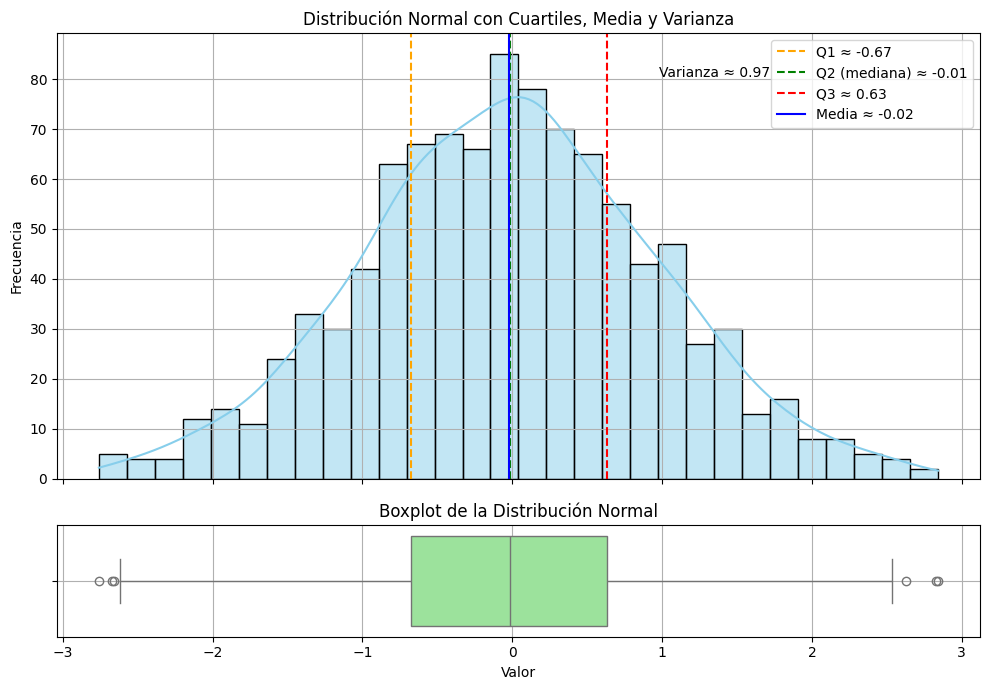

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos normales
data = np.random.normal(loc=0, scale=1, size=1000)

# Cuartiles
q1 = np.percentile(data, 25)
q2 = np.median(data)
q3 = np.percentile(data, 75)

# Media y varianza
media = np.mean(data)
varianza = np.var(data)

# Gráficas combinadas: histograma + boxplot alineado
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), gridspec_kw={'height_ratios': [4, 1]}, sharex=True)

# Histograma con densidad
sns.histplot(data, bins=30, kde=True, color="skyblue", ax=ax1)
ax1.axvline(q1, color='orange', linestyle='--', label=f'Q1 ≈ {q1:.2f}')
ax1.axvline(q2, color='green', linestyle='--', label=f'Q2 (mediana) ≈ {q2:.2f}')
ax1.axvline(q3, color='red', linestyle='--', label=f'Q3 ≈ {q3:.2f}')
ax1.axvline(media, color='blue', linestyle='-', label=f'Media ≈ {media:.2f}')
ax1.text(x=media + 1, y=ax1.get_ylim()[1] * 0.9, s=f'Varianza ≈ {varianza:.2f}', fontsize=10, color='black')
ax1.set_title("Distribución Normal con Cuartiles, Media y Varianza")
ax1.set_ylabel("Frecuencia")
ax1.legend()
ax1.grid(True)

# Boxplot alineado debajo
sns.boxplot(x=data, color="lightgreen", ax=ax2)
ax2.set_title("Boxplot de la Distribución Normal")
ax2.set_xlabel("Valor")
ax2.grid(True)

plt.tight_layout()
plt.show()

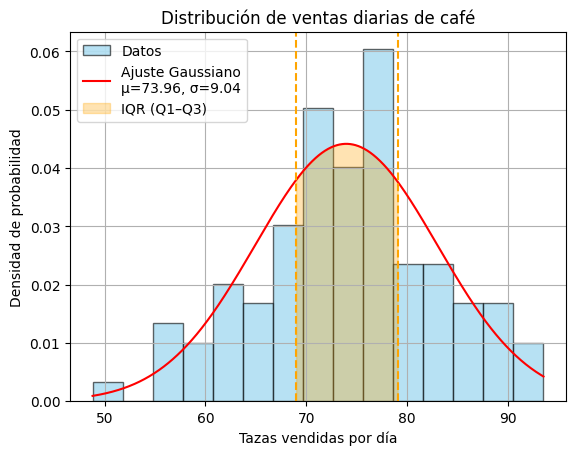

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulamos datos de ejemplo: tasas de café vendidas por día (normalmente distribuidos)
np.random.seed(42)  # Para reproducibilidad
ventas_cafe = np.random.normal(loc=75, scale=10, size=100)  # media=75, desviación=10

# Histograma de los datos
count, bins, ignored = plt.hist(ventas_cafe, bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Datos')

# Ajuste de la distribución normal
mu, sigma = norm.fit(ventas_cafe)
x = np.linspace(min(bins), max(bins), 1000)
y = norm.pdf(x, mu, sigma)

# Curva Gaussiana ajustada
plt.plot(x, y, 'r-', label=f'Ajuste Gaussiano\nμ={mu:.2f}, σ={sigma:.2f}')

# Opcional: sombrear el IQR
q1, q3 = np.percentile(ventas_cafe, [25, 75])
x_iqr = np.linspace(q1, q3, 500)
y_iqr = norm.pdf(x_iqr, mu, sigma)
plt.fill_between(x_iqr, y_iqr, color='orange', alpha=0.3, label='IQR (Q1–Q3)')
plt.axvline(q1, color='orange', linestyle='--')
plt.axvline(q3, color='orange', linestyle='--')

# Etiquetas y leyenda
plt.title('Distribución de ventas diarias de café')
plt.xlabel('Tazas vendidas por día')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# 📊 Análisis Estadístico de Ventas de Café

Esta actividad proporciona una oportunidad práctica para aplicar conceptos estadísticos fundamentales en el contexto empresarial, reforzando la comprensión sobre la utilidad de la estadística en la toma de decisiones organizativas.

Analizaremos las ventas diarias de una cafetería durante 30 días.


## 1. Organización y Representación de la Información

Simularemos datos de ventas diarias de café y los organizaremos en una tabla.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulamos datos de ventas diarias en unidades de café
np.random.seed(42)  # Para reproducibilidad
ventas_cafe = np.random.randint(80, 150, size=30)  # 30 días de ventas

# Creamos un DataFrame para organizarlos
df = pd.DataFrame({
    "Día": np.arange(1, 31),
    "Ventas": ventas_cafe
})

# Mostramos los primeros registros
df.head()

,Día,Ventas
0,1,131
1,2,94
2,3,140
3,4,100
4,5,103


## 2. Representación de Datos no Agrupados y Agrupados

Visualizaremos los datos con un gráfico de líneas (no agrupados) y un histograma (agrupados).


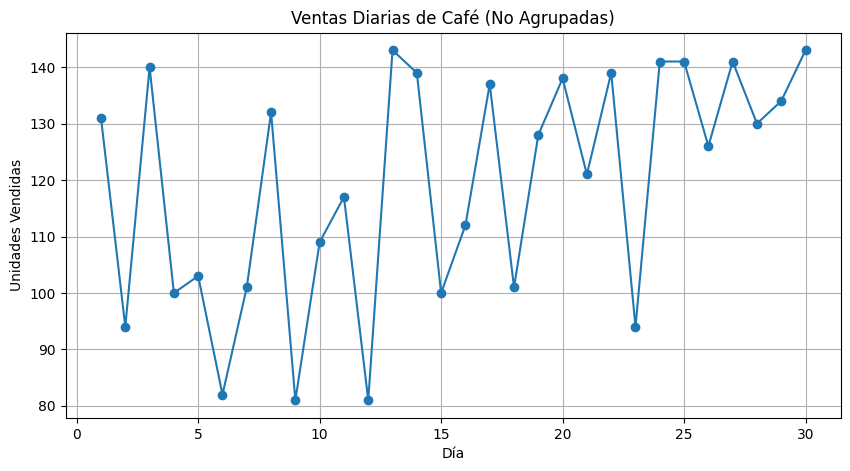

In [33]:
import matplotlib.pyplot as plt

# Gráfico de líneas
plt.figure(figsize=(10, 5))
plt.plot(df["Día"], df["Ventas"], marker='o')
plt.title("Ventas Diarias de Café (No Agrupadas)")
plt.xlabel("Día")
plt.ylabel("Unidades Vendidas")
plt.grid(True)
plt.show()

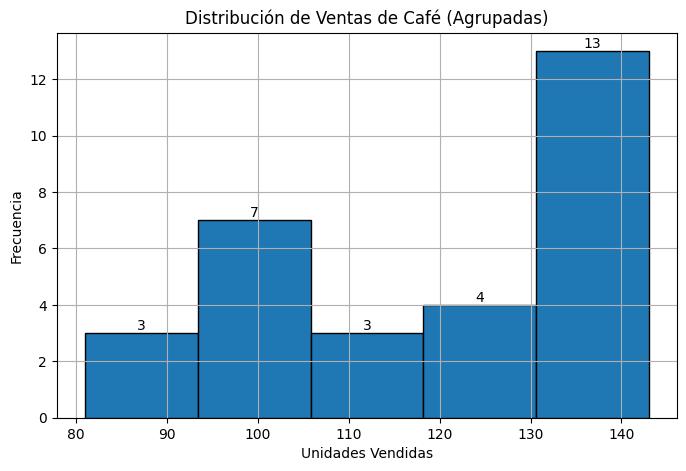

In [34]:
# Histograma con intervalos de clase
plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(df["Ventas"], bins=5, edgecolor='black')
plt.title("Distribución de Ventas de Café (Agrupadas)")
plt.xlabel("Unidades Vendidas")
plt.ylabel("Frecuencia")
plt.grid(True)

# Añadir el número de observaciones encima de cada bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(counts, bin_centers):
    # Solo añadir el texto si el conteo es mayor que 0
    if count > 0:
        plt.text(x, count, str(int(count)), ha='center', va='bottom')

plt.show()

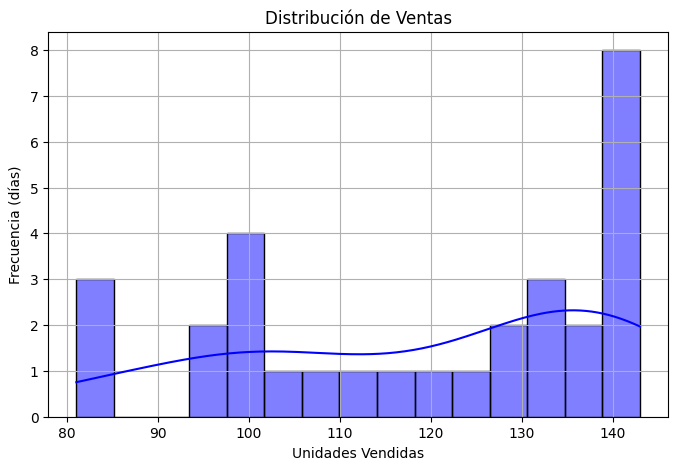

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Ventas"], bins=15, kde=True, color='blue', edgecolor='black')
plt.title("Distribución de Ventas")
plt.xlabel("Unidades Vendidas")
plt.ylabel("Frecuencia (días)")
plt.grid(True)
plt.show()

## 3. Medidas de Tendencia Central: Media, Mediana y Moda

Calcularemos la media, mediana y moda de las ventas.


In [21]:
from scipy import stats

media = df["Ventas"].mean()
mediana = df["Ventas"].median()
moda = stats.mode(df["Ventas"], keepdims=True)

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda.mode[0]} (frecuencia: {moda.count[0]})")

Media: 119.30
Mediana: 127.0
Moda: 141 (frecuencia: 3)


## ✅ Conclusión

Gracias a este análisis, podemos:
- Identificar patrones de compra.
- Estimar pedidos al proveedor.
- Detectar días atípicos y planear promociones.

Este tipo de análisis estadístico básico es clave para una **toma de decisiones informada** en cualquier negocio.




---



In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulamos ventas diarias con distribución normal
np.random.seed(0)
ventas = np.random.normal(loc=120, scale=15, size=100)  # media=120, desviación=15

df = pd.DataFrame({
    "Día": np.arange(1, 101),
    "Ventas": ventas
})

df.head()

,Día,Ventas
0,1,146.460785
1,2,126.002358
2,3,134.681070
3,4,153.613398
4,5,148.013370


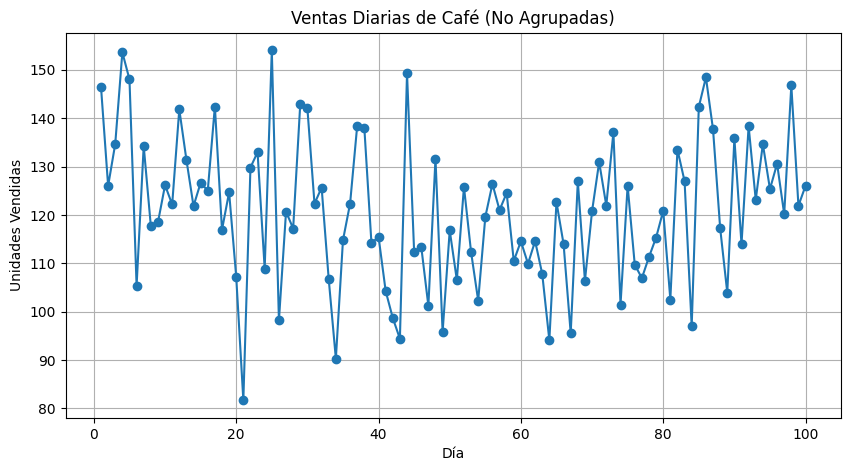

In [40]:
# Gráfico de líneas
plt.figure(figsize=(10, 5))
plt.plot(df["Día"], df["Ventas"], marker='o')
plt.title("Ventas Diarias de Café (No Agrupadas)")
plt.xlabel("Día")
plt.ylabel("Unidades Vendidas")
plt.grid(True)
plt.show()

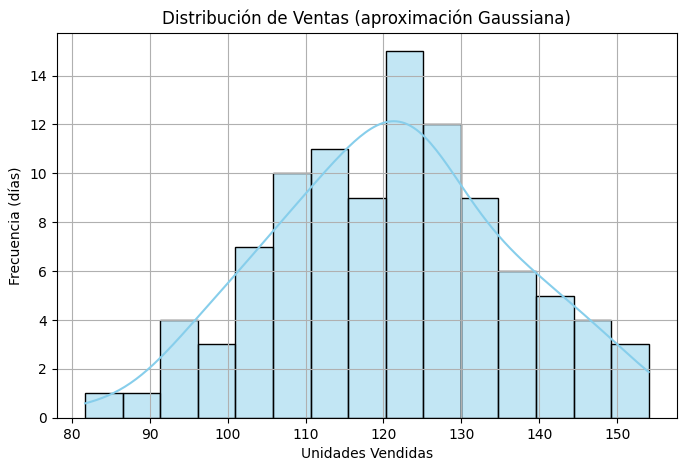

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Ventas"], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribución de Ventas (aproximación Gaussiana)")
plt.xlabel("Unidades Vendidas")
plt.ylabel("Frecuencia (días)")
plt.grid(True)
plt.show()

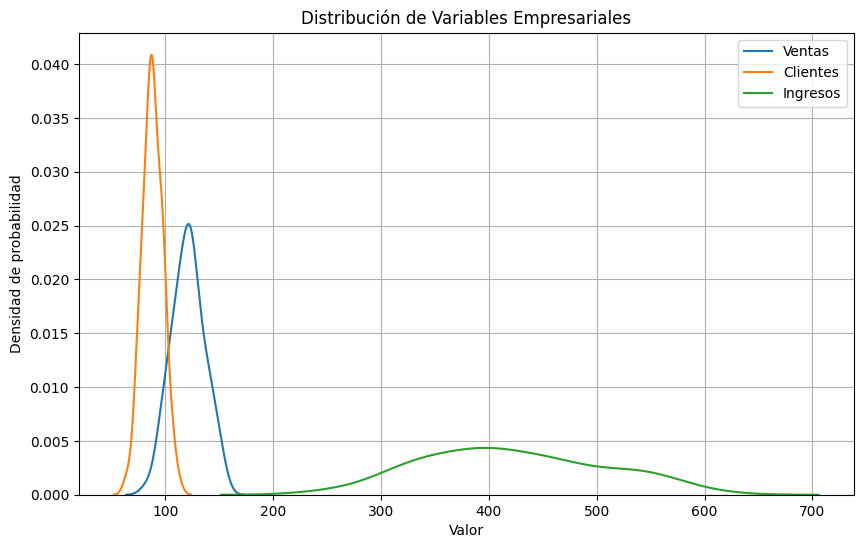

In [43]:
# Simulamos más variables
df["Clientes"] = np.random.normal(loc=90, scale=10, size=100)
df["Ingresos"] = df["Ventas"] * np.random.normal(loc=3.5, scale=0.5, size=100)

# Visualización múltiple
plt.figure(figsize=(10, 6))
for col in ["Ventas", "Clientes", "Ingresos"]:
    sns.kdeplot(df[col], label=col)

plt.title("Distribución de Variables Empresariales")
plt.xlabel("Valor")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()